#Import Packages

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

!pip install nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
# Download VADER lexicon (run this once)
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Import Data

In [54]:
#if running on Google Colab, run this cell to mount to Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
#modify filepaths to match where they are stored on YOUR local machine or Google Drive

review_filepath = '/content/drive/MyDrive/DS4002/Project 1/rotten_tomatoes_movie_reviews.csv'
movie_info_filepath = '/content/drive/MyDrive/DS4002/Project 1/rotten_tomatoes_movies.csv'

In [56]:
review_df = pd.read_csv(review_filepath)

review_df = review_df.rename(columns={'id': 'movie_id'})

review_df.head(10)

,movie_id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...


In [57]:
movie_info_df = pd.read_csv(movie_info_filepath)

movie_info_df = movie_info_df.rename(columns={'id': 'movie_id'})

movie_info_df.head(10)

,movie_id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN
5,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,NaN,NaN,NaN,NaN,2015-10-05,88.0,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,NaN,NaN,NaN
7,kakabakaba-ka-ba,Kakabakaba ka ba? (Will Your Heart Beat Faster?),88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mike de Leon,NaN,NaN,NaN,NaN
8,sundowning,Sundowning,NaN,NaN,NaN,NaN,NaN,NaN,123.0,Drama,English,Jim Comas Cole,NaN,NaN,NaN,NaN
9,1035316-born_to_kill,Born to Kill,74.0,83.0,NaN,NaN,1947-04-30,2016-05-23,92.0,"Crime, Drama",English,Robert Wise,"Eve Greene,Richard Macaulay",NaN,NaN,NaN


#Exploratory Data Analysis

In [58]:
#row summary stats of the dataframes

num_reviews = review_df.shape[0]
print(f"Number of reviews in review_df: {num_reviews}")

num_movies = movie_info_df.shape[0]
print(f"Number of movies in movie_info_df: {num_movies}")

num_reviewed_movies = review_df['movie_id'].nunique()
print(f"Number of unique movies reviewed in review_df: {num_reviewed_movies}")

Number of reviews in review_df: 1444963
Number of movies in movie_info_df: 143258
Number of unique movies reviewed in review_df: 69263


In [59]:
#movies that have reviews written in review_df but no movie info in movie_info_df

not_in_movie_info_df = review_df[~review_df['movie_id'].isin(movie_info_df['movie_id'])]

missing_movies = not_in_movie_info_df['movie_id'].unique()

print(f"Reviewed movies not included in movie_info_df: {missing_movies}")

Reviewed movies not included in movie_info_df: ['0814255' '0878835' 'fight_church']


##Exploratory Graph

In [60]:
# Movies have the most reviews in review_df

movie_id_value_counts = review_df['movie_id'].value_counts()

#print("All unique 'id' values with their counts:")
#print(movie_id_value_counts)

# Print top N 'id' values with the most counts
top_n = 30
print(f"\nTop {top_n} 'movie_id' values with the most reviews:")
print(movie_id_value_counts.head(top_n))


#add top_n movie_id values to list
top_reviewed_movies_list = movie_id_value_counts.head(top_n).index.tolist()


Top 30 'movie_id' values with the most reviews:
movie_id
parasite_2019                       954
ant_man_and_the_wasp_quantumania    760
joker_2019                          597
once_upon_a_time_in_hollywood       580
avengers_endgame                    555
captain_marvel                      552
a_star_is_born_2018                 534
black_panther_2018                  531
star_wars_the_rise_of_skywalker     522
the_batman                          508
dune_2021                           498
avengers_infinity_war               490
star_wars_the_last_jedi             487
2012                                486
solo_a_star_wars_story              484
wonder_woman_2017                   479
snow_white_and_the_huntsman         478
knives_out                          474
la_la_land                          470
top_gun_maverick                    469
dunkirk_2017                        468
the_irishman                        468
28_days_later                       466
rogue_one_a_star_wars_

In [61]:
#create dataframes from original two based on the top 30 reviewed movies

top30_review_df = review_df[review_df['movie_id'].isin(top_reviewed_movies_list)]

top30_movie_info_df = movie_info_df[movie_info_df['movie_id'].isin(top_reviewed_movies_list)]


In [62]:
#create merged dataframe

top30_review_and_info_df = pd.merge(top30_review_df, top30_movie_info_df, on='movie_id')

top30_review_and_info_df.head()

,movie_id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,...,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,black_widow_2021,102775076,2023-01-31,David Gonzalez,False,3.5/4,fresh,The Cinematic Reel,Black Widow is both complex and engaging as it...,POSITIVE,...,2021-07-09,2021-10-06,133.0,"Action, Adventure",English,Cate Shortland,Eric Pearson,$183.6M,Walt Disney,"Dolby Digital, Dolby Atmos"
1,black_widow_2021,102767327,2023-01-08,Joseph Garcia,False,4/5,fresh,Dynamic Duel Podcast,Natasha and Yelena are&#46;&#46;&#46; kicking ...,POSITIVE,...,2021-07-09,2021-10-06,133.0,"Action, Adventure",English,Cate Shortland,Eric Pearson,$183.6M,Walt Disney,"Dolby Digital, Dolby Atmos"
2,black_widow_2021,102758793,2022-12-06,Tom Shone,False,3/5,rotten,Sunday Times (UK),"Pugh is fabulous, by a long mile the best thin...",NEGATIVE,...,2021-07-09,2021-10-06,133.0,"Action, Adventure",English,Cate Shortland,Eric Pearson,$183.6M,Walt Disney,"Dolby Digital, Dolby Atmos"
3,black_widow_2021,102740972,2022-10-09,M.N. Miller,False,4/5,fresh,Ready Steady Cut,Harbour&#8217;s Alexi stands out among this ta...,POSITIVE,...,2021-07-09,2021-10-06,133.0,"Action, Adventure",English,Cate Shortland,Eric Pearson,$183.6M,Walt Disney,"Dolby Digital, Dolby Atmos"
4,black_widow_2021,102726310,2022-09-01,Zoë Rose Bryant,False,4/5,fresh,Loud and Clear Reviews,Black Widow is a fitting finale for star Scarl...,POSITIVE,...,2021-07-09,2021-10-06,133.0,"Action, Adventure",English,Cate Shortland,Eric Pearson,$183.6M,Walt Disney,"Dolby Digital, Dolby Atmos"


In [63]:
# Make a df with movie_id and counts of reviews after streaming
top30_counts_df1 = top30_review_and_info_df[top30_review_and_info_df['creationDate'] > top30_review_and_info_df['releaseDateStreaming']]

# Count occurrences of movie_id where this condition is true
count1_df = top30_counts_df1.groupby('movie_id').size().reset_index(name='count_review_after_streaming')

# Make a df with movie_id and counts of reviews before streaming
top30_counts_df2 = top30_review_and_info_df[top30_review_and_info_df['creationDate'] <= top30_review_and_info_df['releaseDateStreaming']]

# Count occurrences of movie_id where this condition is true
count2_df = top30_counts_df2.groupby('movie_id').size().reset_index(name='count_review_before_streaming')

#merge the two count dataframes
top30_review_count_summary_df = pd.merge(count2_df, count1_df, on='movie_id')

#add in title field
top30_review_count_summary_df = top30_review_count_summary_df.merge(movie_info_df[['movie_id','title']], on='movie_id', how='left')

#remove duplicate occurances
top30_review_count_summary_df = top30_review_count_summary_df.drop_duplicates(subset='movie_id', keep='first')

top30_review_count_summary_df.head(5)

,movie_id,count_review_before_streaming,count_review_after_streaming,title
0,2012,856,116,2012
2,28_days_later,740,192,28 Days Later
4,a_star_is_born_2018,460,74,A Star Is Born
5,avengers_endgame,480,75,Avengers: Endgame
6,avengers_infinity_war,339,151,Avengers: Infinity War


In [64]:
top30_review_count_summary_df.head(35)

,movie_id,count_review_before_streaming,count_review_after_streaming,title
0,2012,856,116,2012
2,28_days_later,740,192,28 Days Later
4,a_star_is_born_2018,460,74,A Star Is Born
5,avengers_endgame,480,75,Avengers: Endgame
6,avengers_infinity_war,339,151,Avengers: Infinity War
7,black_panther_2018,377,154,Black Panther
8,black_widow_2021,428,26,Black Widow
9,captain_marvel,466,86,Captain Marvel
10,dune_2021,301,197,Dune
11,dunkirk_2017,363,105,Dunkirk


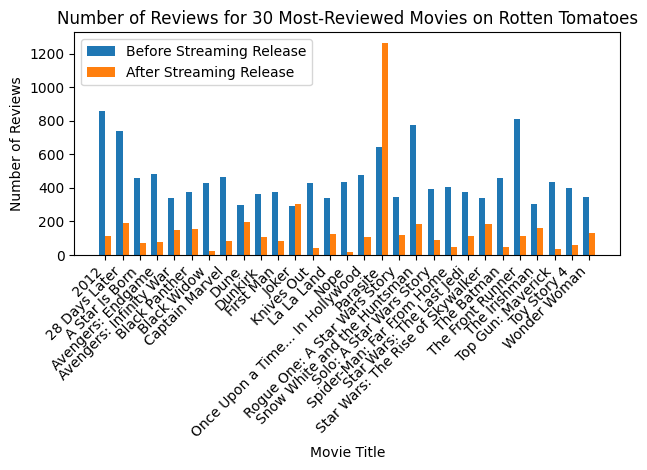

In [65]:
#make bar graph of values

# Set the "title" column as the x-axis labels
labels = top30_review_count_summary_df.iloc[:, 3]

# Get the data for the two integer columns
col1 = top30_review_count_summary_df.iloc[:, 1]
col2 = top30_review_count_summary_df.iloc[:, 2]

bar_width = 0.35

# Set the positions of the bars on the x-axis
index = range(len(labels))

# Create the bar chart
fig, ax = plt.subplots()

# Create bars for the first and second integer columns
bar1 = ax.bar(index, col1, bar_width, label='Before Streaming Release')
bar2 = ax.bar([i + bar_width for i in index], col2, bar_width, label='After Streaming Release')

# Add labels, title, and legend
ax.set_xlabel('Movie Title')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews for 30 Most-Reviewed Movies on Rotten Tomatoes')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, rotation=90, ha='right')
ax.legend()


# Display the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Data Cleaning

##Clean Movie Info

In [66]:
movie_info_df_cleaned = movie_info_df

#remove unneeded fields from movie_info_df
columns_to_remove = ['genre', 'rating', 'ratingContents', 'runtimeMinutes', 'releaseDateTheaters', 'originalLanguage', 'director', 'writer', 'boxOffice', 'distributor', 'soundMix']
movie_info_df_cleaned = movie_info_df_cleaned.drop(columns=columns_to_remove)

#remove rows with NaN values in key fields from movie_info_df
movie_info_df_cleaned.dropna(subset=['audienceScore', 'releaseDateStreaming'], inplace=True)

##Clean Movie Reviews

In [67]:
review_df_cleaned = review_df

#remove reviews that don't have complete info available in movie_info_df
review_df_cleaned = review_df_cleaned[review_df_cleaned['movie_id'].isin(movie_info_df_cleaned['movie_id'])]

#remove unneeded fields from review_df
review_columns_to_remove = ['criticName', 'isTopCritic', 'publicatioName', 'reviewUrl']
review_df_cleaned.drop(columns=review_columns_to_remove, inplace=True)

#remove rows with NaN values in key fields from review_df
review_df_cleaned.dropna(subset=['reviewText'], inplace=True)


<ipython-input-67-2d36635b1d35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_cleaned.drop(columns=review_columns_to_remove, inplace=True)
<ipython-input-67-2d36635b1d35>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_cleaned.dropna(subset=['reviewText'], inplace=True)


#Merged Data & Analysis

In [68]:
# Merge datsets to attach movie info for each review
merged_movie_df = pd.merge(movie_info_df_cleaned, review_df_cleaned, on='movie_id')

#rename field for clarity
merged_movie_df = merged_movie_df.rename(columns={'creationDate': 'reviewDate'})

#create bool field for if review is before or after streaming release
merged_movie_df['review_after_streaming'] = (merged_movie_df['reviewDate'] > merged_movie_df['releaseDateStreaming']).astype(int)

merged_movie_df.head()

,movie_id,title,audienceScore,tomatoMeter,releaseDateStreaming,reviewId,reviewDate,originalScore,reviewState,reviewText,scoreSentiment,review_after_streaming
0,adrift_2018,Adrift,65.0,69.0,2018-08-21,102694850,2022-05-29,6/10,fresh,This is nowhere near the level of other great ...,POSITIVE,1
1,adrift_2018,Adrift,65.0,69.0,2018-08-21,102654799,2022-02-11,NaN,fresh,"Adrift somehow survives the late reveal, and t...",POSITIVE,1
2,adrift_2018,Adrift,65.0,69.0,2018-08-21,2816011,2021-08-21,C+,rotten,"For almost the entire runtime, the only people...",NEGATIVE,1
3,adrift_2018,Adrift,65.0,69.0,2018-08-21,2812722,2021-08-11,NaN,fresh,Shailene Woodley shows no fear diving on and o...,POSITIVE,1
4,adrift_2018,Adrift,65.0,69.0,2018-08-21,2772153,2021-02-28,2/5,rotten,What is meant to be a voyage of self-discovery...,NEGATIVE,1


In [69]:
#run vader sentiment analysis on review text, store complete score in new field "vaderScore" & compound score in new field "compoundScore"
merged_movie_df['vaderScore'] = merged_movie_df['reviewText'].apply(lambda review: analyzer.polarity_scores(review))
merged_movie_df['compoundScore'] = merged_movie_df['vaderScore'].apply(lambda vaderScore_dict: vaderScore_dict['compound'])

merged_movie_df.head()

,movie_id,title,audienceScore,tomatoMeter,releaseDateStreaming,reviewId,reviewDate,originalScore,reviewState,reviewText,scoreSentiment,review_after_streaming,vaderScore,compoundScore
0,adrift_2018,Adrift,65.0,69.0,2018-08-21,102694850,2022-05-29,6/10,fresh,This is nowhere near the level of other great ...,POSITIVE,1,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.7717
1,adrift_2018,Adrift,65.0,69.0,2018-08-21,102654799,2022-02-11,NaN,fresh,"Adrift somehow survives the late reveal, and t...",POSITIVE,1,"{'neg': 0.06, 'neu': 0.792, 'pos': 0.147, 'com...",0.5118
2,adrift_2018,Adrift,65.0,69.0,2018-08-21,2816011,2021-08-21,C+,rotten,"For almost the entire runtime, the only people...",NEGATIVE,1,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.3400
3,adrift_2018,Adrift,65.0,69.0,2018-08-21,2812722,2021-08-11,NaN,fresh,Shailene Woodley shows no fear diving on and o...,POSITIVE,1,"{'neg': 0.24, 'neu': 0.624, 'pos': 0.136, 'com...",-0.6705
4,adrift_2018,Adrift,65.0,69.0,2018-08-21,2772153,2021-02-28,2/5,rotten,What is meant to be a voyage of self-discovery...,NEGATIVE,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [70]:
#classify compound scores into 5 categories & store value in new field "vaderSentiment"

# Define a function to classify the compound scores
def label_sentiment(score):
    if -1.0 <= score < -0.75:
        return 'Very Negative'
    elif -0.75 <= score < -0.5:
        return 'Negative'
    elif -0.5 <= score <= 0.5:
        return 'Neutral'
    elif 0.5 < score <= 0.75:
        return 'Positive'
    elif 0.75 < score <= 1.0:
        return 'Very Positive'

# Apply the function to create a new 'vaderSentiment' field
merged_movie_df['vaderSentiment'] = merged_movie_df['compoundScore'].apply(label_sentiment)

merged_movie_df.head()

,movie_id,title,audienceScore,tomatoMeter,releaseDateStreaming,reviewId,reviewDate,originalScore,reviewState,reviewText,scoreSentiment,review_after_streaming,vaderScore,compoundScore,vaderSentiment
0,adrift_2018,Adrift,65.0,69.0,2018-08-21,102694850,2022-05-29,6/10,fresh,This is nowhere near the level of other great ...,POSITIVE,1,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.7717,Very Positive
1,adrift_2018,Adrift,65.0,69.0,2018-08-21,102654799,2022-02-11,NaN,fresh,"Adrift somehow survives the late reveal, and t...",POSITIVE,1,"{'neg': 0.06, 'neu': 0.792, 'pos': 0.147, 'com...",0.5118,Positive
2,adrift_2018,Adrift,65.0,69.0,2018-08-21,2816011,2021-08-21,C+,rotten,"For almost the entire runtime, the only people...",NEGATIVE,1,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.3400,Neutral
3,adrift_2018,Adrift,65.0,69.0,2018-08-21,2812722,2021-08-11,NaN,fresh,Shailene Woodley shows no fear diving on and o...,POSITIVE,1,"{'neg': 0.24, 'neu': 0.624, 'pos': 0.136, 'com...",-0.6705,Negative
4,adrift_2018,Adrift,65.0,69.0,2018-08-21,2772153,2021-02-28,2/5,rotten,What is meant to be a voyage of self-discovery...,NEGATIVE,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


#Analysis Summary

In [71]:
#create base summary dataframe

summary_df = merged_movie_df[['movie_id', 'title', 'audienceScore']]
summary_df = summary_df.drop_duplicates()

summary_df.head()

,movie_id,title,audienceScore
0,adrift_2018,Adrift,65.0
40,1035316-born_to_kill,Born to Kill,74.0
46,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86.0
102,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0
132,1005521-death_of_a_salesman,Death of a Salesman,75.0


In [72]:
#add score counts for reviews AFTER streaming into summary_df

label_sentiment_list = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

for label in label_sentiment_list:
  filtered_df = merged_movie_df[(merged_movie_df['review_after_streaming'] == 1) & (merged_movie_df['vaderSentiment'] == label)]
  result_df = filtered_df.groupby('movie_id').size().reset_index(name=label)
  summary_df = pd.merge(summary_df, result_df, on='movie_id', how='left')

#rename fields
summary_df = summary_df.rename(columns={'Very Negative': 'After_VNeg'})
summary_df = summary_df.rename(columns={'Negative': 'After_Neg'})
summary_df = summary_df.rename(columns={'Neutral': 'After_Neu'})
summary_df = summary_df.rename(columns={'Very Positive': 'After_VPos'})
summary_df = summary_df.rename(columns={'Positive': 'After_Pos'})

summary_df.head()

,movie_id,title,audienceScore,After_VNeg,After_Neg,After_Neu,After_Pos,After_VPos
0,adrift_2018,Adrift,65.0,NaN,6.0,22.0,6.0,6.0
1,1035316-born_to_kill,Born to Kill,74.0,NaN,NaN,2.0,NaN,NaN
2,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86.0,NaN,NaN,14.0,3.0,9.0
3,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,NaN,NaN,NaN,NaN,NaN
4,1005521-death_of_a_salesman,Death of a Salesman,75.0,NaN,NaN,1.0,NaN,NaN


In [73]:
#add score counts for reviews BEFORE streaming into summary_df

label_sentiment_list = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

for label in label_sentiment_list:
  filtered_df = merged_movie_df[(merged_movie_df['review_after_streaming'] == 0) & (merged_movie_df['vaderSentiment'] == label)]
  result_df = filtered_df.groupby('movie_id').size().reset_index(name=label)
  summary_df = pd.merge(summary_df, result_df, on='movie_id', how='left')

#rename fields
summary_df = summary_df.rename(columns={'Very Negative': 'Before_VNeg'})
summary_df = summary_df.rename(columns={'Negative': 'Before_Neg'})
summary_df = summary_df.rename(columns={'Neutral': 'Before_Neu'})
summary_df = summary_df.rename(columns={'Very Positive': 'Before_VPos'})
summary_df = summary_df.rename(columns={'Positive': 'Before_Pos'})

#replace NaN counts with 0
summary_df = summary_df.fillna(0)

summary_df.head()

,movie_id,title,audienceScore,After_VNeg,After_Neg,After_Neu,After_Pos,After_VPos,Before_VNeg,Before_Neg,Before_Neu,Before_Pos,Before_VPos
0,adrift_2018,Adrift,65.0,0.0,6.0,22.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0
1,1035316-born_to_kill,Born to Kill,74.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
2,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86.0,0.0,0.0,14.0,3.0,9.0,1.0,0.0,13.0,7.0,9.0
3,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,20.0,4.0,2.0
4,1005521-death_of_a_salesman,Death of a Salesman,75.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0


In [74]:
#add average compound score before & after streaming into summary_df

filtered_df = merged_movie_df[merged_movie_df['review_after_streaming'] == 1]
result_df = filtered_df.groupby('movie_id')['compoundScore'].mean().reset_index()
#rename columns for clarity
result_df.columns = ['movie_id', 'After_average_compoundScore']
summary_df = pd.merge(summary_df, result_df, on='movie_id', how='left')

filtered_df = merged_movie_df[merged_movie_df['review_after_streaming'] == 0]
result_df = filtered_df.groupby('movie_id')['compoundScore'].mean().reset_index()
#rename columns for clarity
result_df.columns = ['movie_id', 'Before_average_compoundScore']
summary_df = pd.merge(summary_df, result_df, on='movie_id', how='left')

#replace NaN counts with 0
summary_df = summary_df.fillna(0)

summary_df.head()

,movie_id,title,audienceScore,After_VNeg,After_Neg,After_Neu,After_Pos,After_VPos,Before_VNeg,Before_Neg,Before_Neu,Before_Pos,Before_VPos,After_average_compoundScore,Before_average_compoundScore
0,adrift_2018,Adrift,65.0,0.0,6.0,22.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.143635,0.000000
1,1035316-born_to_kill,Born to Kill,74.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,-0.064000,0.159875
2,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86.0,0.0,0.0,14.0,3.0,9.0,1.0,0.0,13.0,7.0,9.0,0.446450,0.459303
3,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,20.0,4.0,2.0,0.000000,-0.020860
4,1005521-death_of_a_salesman,Death of a Salesman,75.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,-0.493900,0.268750


In [75]:
#multilpy avg compound scores by 100 to shift scale to match audience score
summary_df['Before_shiftCompoundScore'] = (summary_df['Before_average_compoundScore'] + 1) * 50
summary_df['After_shiftCompoundScore'] = (summary_df['After_average_compoundScore'] + 1) * 50

In [76]:
#compare average compound scores to audience score to determine if scores are shifting to align with the audience
for index, row in summary_df.iterrows():
    diff_1 = abs(row['Before_shiftCompoundScore'] - row['audienceScore'])
    diff_2 = abs(row['After_shiftCompoundScore'] - row['audienceScore'])

    if diff_2 < diff_1:
        summary_df.loc[index, 'shift_aligned'] = 1
    else:
        summary_df.loc[index, 'shift_aligned'] = 0

summary_df.head(10)

,movie_id,title,audienceScore,After_VNeg,After_Neg,After_Neu,After_Pos,After_VPos,Before_VNeg,Before_Neg,Before_Neu,Before_Pos,Before_VPos,After_average_compoundScore,Before_average_compoundScore,Before_shiftCompoundScore,After_shiftCompoundScore,shift_aligned
0,adrift_2018,Adrift,65.0,0.0,6.0,22.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.143635,0.000000,50.000000,57.181750,1.0
1,1035316-born_to_kill,Born to Kill,74.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,-0.064000,0.159875,57.993750,46.800000,0.0
2,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86.0,0.0,0.0,14.0,3.0,9.0,1.0,0.0,13.0,7.0,9.0,0.446450,0.459303,72.965167,72.322500,0.0
3,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,20.0,4.0,2.0,0.000000,-0.020860,48.957000,50.000000,1.0
4,1005521-death_of_a_salesman,Death of a Salesman,75.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,-0.493900,0.268750,63.437500,25.305000,0.0
5,escape_from_alcatraz,Escape From Alcatraz,85.0,1.0,1.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.176510,0.000000,50.000000,58.825476,1.0
6,a_state_of_mind_2005,A State of Mind,92.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,5.0,2.0,0.361200,0.182772,59.138600,68.060000,1.0
7,the_in_laws_1979,The In-Laws,83.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.430043,0.217080,60.854000,71.502143,1.0
8,isteve,iSteve,39.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.195600,0.000000,50.000000,59.780000,0.0
9,gun_shy_2017,Salty,38.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,0.0,-0.765750,-0.384667,30.766667,11.712500,0.0


#Outputs

In [77]:
# Count the total number of rows where shift_aligned is 1
aligned_count = summary_df['shift_aligned'].sum()

# Calculate the percentage
percent_aligned = (aligned_count / len(summary_df)) * 100

print(f"Percentage of rows with shift_aligned = 1: {percent_aligned:.2f}%")


Percentage of rows with shift_aligned = 1: 46.54%


In [79]:
# Filter summary_df to include only movies with both before and after data
filtered_movies = summary_df[
    (summary_df[['Before_VNeg', 'Before_Neg', 'Before_Neu', 'Before_Pos', 'Before_VPos']].sum(axis=1) > 0) &
    (summary_df[['After_VNeg', 'After_Neg', 'After_Neu', 'After_Pos', 'After_VPos']].sum(axis=1) > 0)
]

# Select only the first 10 movies from the filtered dataset
first_10_movies = filtered_movies.head(10)

In [80]:
#select 9 movies to visualize

small_movies_df = summary_df[summary_df['movie_id'].isin(['knives_out', 'once_upon_a_time_in_hollywood', 'joker_2019', 'wonder_woman_2017', 'a_star_is_born_2018', 'the_irishman', 'dune_2021', 'star_wars_the_rise_of_skywalker', 'the_batman' ])]

small_movies_df.head(100)

,movie_id,title,audienceScore,After_VNeg,After_Neg,After_Neu,After_Pos,After_VPos,Before_VNeg,Before_Neg,Before_Neu,Before_Pos,Before_VPos,After_average_compoundScore,Before_average_compoundScore,Before_shiftCompoundScore,After_shiftCompoundScore,shift_aligned
1608,star_wars_the_rise_of_skywalker,Star Wars: The Rise of Skywalker,86.0,10.0,25.0,92.0,26.0,31.0,17.0,29.0,169.0,69.0,54.0,0.133704,0.195096,59.754778,56.685217,0.0
6799,dune_2021,Dune,90.0,3.0,10.0,100.0,48.0,36.0,0.0,17.0,158.0,65.0,61.0,0.309672,0.341501,67.075050,65.483604,0.0
16476,joker_2019,Joker,88.0,23.0,34.0,175.0,42.0,29.0,29.0,35.0,161.0,47.0,22.0,0.033598,0.006532,50.326616,51.679917,1.0
18777,knives_out,Knives Out,92.0,0.0,2.0,16.0,6.0,19.0,5.0,22.0,174.0,110.0,120.0,0.496898,0.404064,70.203213,74.844884,1.0
24758,the_irishman,The Irishman,86.0,4.0,17.0,82.0,39.0,20.0,15.0,32.0,147.0,55.0,57.0,0.203612,0.196089,59.804461,60.180586,1.0
25728,the_batman,The Batman,87.0,0.0,7.0,22.0,8.0,10.0,19.0,37.0,216.0,97.0,91.0,0.234796,0.259974,62.998717,61.739787,0.0
30431,wonder_woman_2017,Wonder Woman,83.0,5.0,5.0,44.0,28.0,49.0,5.0,12.0,124.0,81.0,126.0,0.450602,0.478150,73.907514,72.530115,0.0
33635,once_upon_a_time_in_hollywood,Once Upon a Time... In Hollywood,70.0,4.0,4.0,49.0,23.0,25.0,7.0,27.0,238.0,96.0,107.0,0.341056,0.324267,66.213326,67.052810,1.0
34577,a_star_is_born_2018,A Star Is Born,80.0,0.0,1.0,31.0,26.0,16.0,3.0,14.0,213.0,116.0,114.0,0.477181,0.391987,69.599359,73.859054,1.0


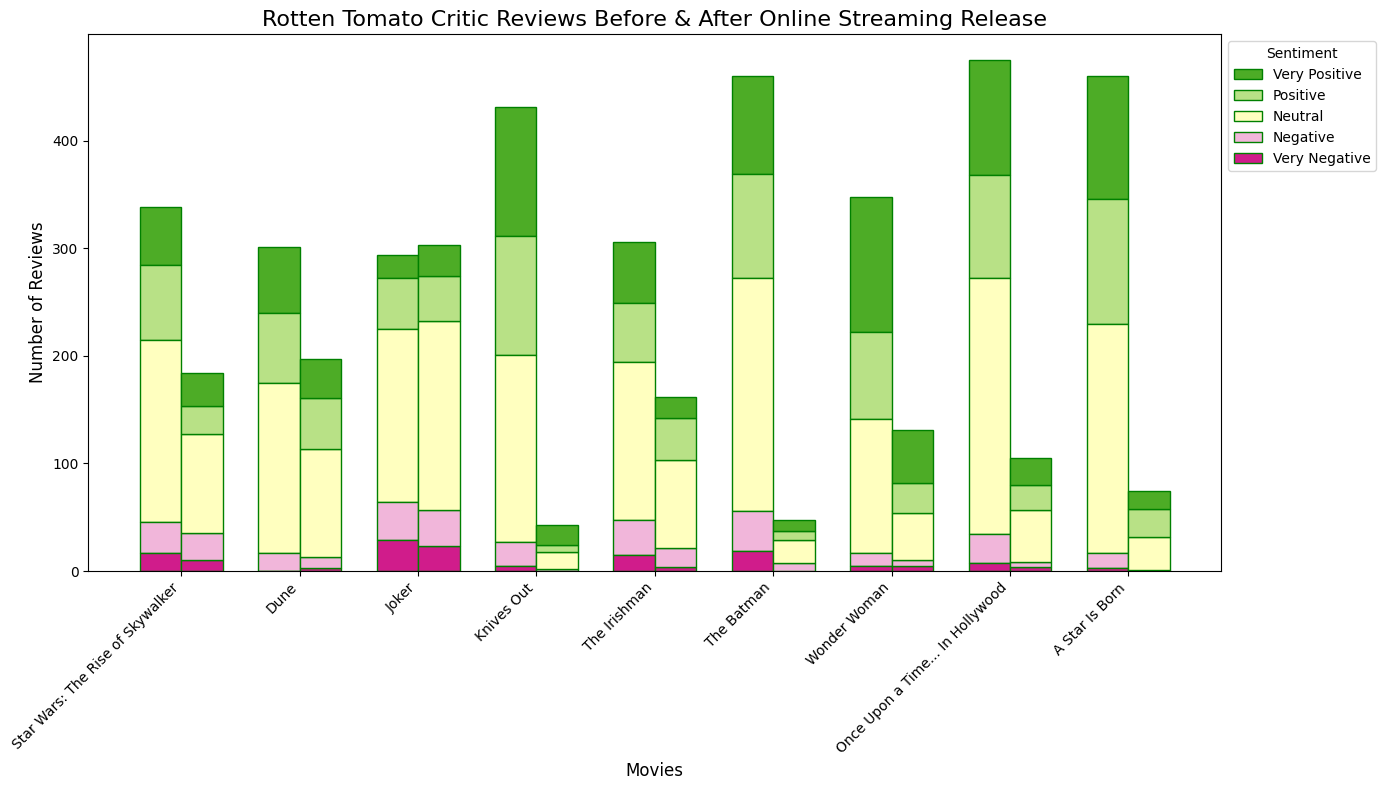

In [81]:
# Prepare data for the stacked bar chart
before_sentiment_counts = small_movies_df[['title', 'Before_VNeg', 'Before_Neg', 'Before_Neu', 'Before_Pos', 'Before_VPos']].fillna(0)
after_sentiment_counts = small_movies_df[['title', 'After_VNeg', 'After_Neg', 'After_Neu', 'After_Pos', 'After_VPos']].fillna(0)

# Set the title as the index for easier plotting
before_sentiment_counts.set_index('title', inplace=True)
after_sentiment_counts.set_index('title', inplace=True)

# Create an array with x positions for the bars (two bars for each movie)
x = np.arange(len(small_movies_df))

# Set the width of the bars
bar_width = 0.35

# Define an diverging spectrum from pink to green for sentiment categories
colors = {
    'Very Negative': '#d01c8b',  # Hot Pink
    'Negative': '#f1b6da',       # Pink
    'Neutral': '#ffffbf',        # Pale Yellow
    'Positive': '#b8e186',       # Light green
    'Very Positive': '#4dac26'   # Green
}

# Plot the stacked bars
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar for 'before' sentiment counts with matching colors
ax.bar(x - bar_width/2, before_sentiment_counts['Before_VPos'], bar_width, bottom=before_sentiment_counts['Before_VNeg'] + before_sentiment_counts['Before_Neg'] + before_sentiment_counts['Before_Neu'] + before_sentiment_counts['Before_Pos'], label='Very Positive', color=colors['Very Positive'], edgecolor='green')
ax.bar(x - bar_width/2, before_sentiment_counts['Before_Pos'], bar_width, bottom=before_sentiment_counts['Before_VNeg'] + before_sentiment_counts['Before_Neg'] + before_sentiment_counts['Before_Neu'], label='Positive', color=colors['Positive'],edgecolor='green')
ax.bar(x - bar_width/2, before_sentiment_counts['Before_Neu'], bar_width, bottom=before_sentiment_counts['Before_VNeg'] + before_sentiment_counts['Before_Neg'], label='Neutral', color=colors['Neutral'],edgecolor='green')
ax.bar(x - bar_width/2, before_sentiment_counts['Before_Neg'], bar_width, bottom=before_sentiment_counts['Before_VNeg'], label='Negative', color=colors['Negative'],edgecolor='green')
ax.bar(x - bar_width/2, before_sentiment_counts['Before_VNeg'], bar_width, label='Very Negative', color=colors['Very Negative'],edgecolor='green')

# Stacked bar for 'after' sentiment counts with matching colors
ax.bar(x + bar_width/2, after_sentiment_counts['After_VNeg'], bar_width, color=colors['Very Negative'],edgecolor='green')
ax.bar(x + bar_width/2, after_sentiment_counts['After_Neg'], bar_width, bottom=after_sentiment_counts['After_VNeg'], color=colors['Negative'],edgecolor='green')
ax.bar(x + bar_width/2, after_sentiment_counts['After_Neu'], bar_width, bottom=after_sentiment_counts['After_VNeg'] + after_sentiment_counts['After_Neg'],  color=colors['Neutral'],edgecolor='green')
ax.bar(x + bar_width/2, after_sentiment_counts['After_Pos'], bar_width, bottom=after_sentiment_counts['After_VNeg'] + after_sentiment_counts['After_Neg'] + after_sentiment_counts['After_Neu'], color=colors['Positive'],edgecolor='green')
ax.bar(x + bar_width/2, after_sentiment_counts['After_VPos'], bar_width, bottom=after_sentiment_counts['After_VNeg'] + after_sentiment_counts['After_Neg'] + after_sentiment_counts['After_Neu'] + after_sentiment_counts['After_Pos'], color=colors['Very Positive'],edgecolor='green')

# Set the chart title and labels
ax.set_title('Rotten Tomato Critic Reviews Before & After Online Streaming Release', fontsize=16)
ax.set_xlabel('Movies', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)

# Set the x-axis tick labels to movie titles
ax.set_xticks(x)
ax.set_xticklabels(small_movies_df['title'], rotation=45, ha='right')

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Sentiment')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()